<a id='section_id'></a>

<h1> <div align="center"><a> Проект «Определение перспективного тарифа для телеком-компании» </a></div>

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

In [2]:
calls_data = pd.read_csv("/datasets/calls.csv")
display(calls_data.head())
display(calls_data.duplicated().sum())
calls_data.info()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Таблица имеет около 200 тыс. строк. Пропущенных значений и дубликатов не обнаружено. Преобразовывать названия столбцов нет необходимости. Данные в столбце call_date представлены в формате object и требуют замены на формат datetime.

In [3]:
internet_data = pd.read_csv("/datasets/internet.csv", index_col=0)
display(internet_data.head())
display(internet_data.duplicated().sum())
internet_data.info()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


0

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


Таблица имеет около 150 тыс. строк. Пропущенных значений и дубликатов не обнаружено. Преобразовывать названия столбцов нет необходимости. Данные в столбце session_date представлены в формате object и требуют замены на формат datetime.

In [4]:
messages_data = pd.read_csv("/datasets/messages.csv")
display(messages_data.head())
display(messages_data.duplicated().sum())
messages_data.info()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Таблица имеет около 120 тыс. строк. Пропущенных значений и дубликатов не обнаружено. Преобразовывать названия столбцов нет необходимости. Данные в столбце message_date представлены в формате object и требуют замены на формат datetime.

In [5]:
tariffs_data = pd.read_csv("/datasets/tariffs.csv")
display(tariffs_data.head())
tariffs_data.info()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [6]:
users_data = pd.read_csv("/datasets/users.csv")
#display(users_data.dropna(subset=['churn_date']))
display(users_data.head())
display(users_data.duplicated().sum())
users_data.info()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Выборка представлена по 500 абонентам. Пропущенных значений и дубликатов не обнаружено. Преобразовывать названия столбцов нет необходимости. Данные в столбце reg_date представлены в формате object и требуют замены на формат datetime. Мы видим, что из 500 абонентов 38 уже прекратили пользоваться рассматриваемыми нами тарифами.

### Вывод
 - самые большие массивы по звонкам, сообщениями и интернет-сессиям (120 - 200 тысяч строк);
 - в исходных массивах данных столбцов с пропущенными значений и дубликатов не обнаружено;
 - преобразовывать названия столбцов нет необходимости;
 - столбцы с датами call_date, message_date и reg_date необходимо преобразовать в формат datetime;
 - 38 абонентов уже не используют рассматриваемые тарифы, что повлияет на расчет выручки по ним.

## Подготовка данных

Посчитаем для каждого пользователя:
 - количество сделанных звонков и израсходованных минут разговора по месяцам, учитывая что каждый звонок округляется до полной минуты;
 - количество отправленных сообщений по месяцам;
 - объем израсходованного интернет-трафика по месяцам, с учетом что общая сумма мегабайт за месяц округляется до гигабайт;
 - помесячную выручку с каждого пользователя.
 
Для этого столбцы с датами call_date, message_date и reg_date преобразуем в формат datetime, чтобы далее извлечь порядковый номер месяца.

In [7]:
calls_data["month"] = pd.DatetimeIndex(calls_data["call_date"]).month
calls_data["duration_round"] = np.ceil(calls_data["duration"])
calls = calls_data.pivot_table(index=['user_id', 'month'],  values= ['duration_round'], aggfunc= ['count', 'sum'])
calls_total_duration = calls["sum", "duration_round"].sum()
display(calls.head())
calls.info()

count            sum
              duration_round duration_round
user_id month                              
1000    5                 22          159.0
        6                 43          172.0
        7                 47          340.0
        8                 52          408.0
        9                 58          466.0

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3174 entries, (1000, 5) to (1499, 12)
Data columns (total 2 columns):
(count, duration_round)    3174 non-null int64
(sum, duration_round)      3174 non-null float64
dtypes: float64(1), int64(1)
memory usage: 62.9 KB


In [8]:
messages_data["month"] = pd.DatetimeIndex(messages_data["message_date"]).month
messages = messages_data.pivot_table(index=['user_id', 'month'],  values= ['id'], aggfunc= ['count'])
display(messages.head())
messages.info()

count
                 id
user_id month      
1000    5        22
        6        60
        7        75
        8        81
        9        57

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2717 entries, (1000, 5) to (1499, 12)
Data columns (total 1 columns):
(count, id)    2717 non-null int64
dtypes: int64(1)
memory usage: 32.7 KB


In [9]:
internet_data["month"] = pd.DatetimeIndex(internet_data["session_date"]).month
internet = internet_data.pivot_table(index=['user_id', 'month'],  values= ['mb_used'], aggfunc= ['sum'])
internet ['gb_used'] = np.ceil(internet['sum','mb_used']/1024)
internet = internet.drop(('sum','mb_used'), axis = 1)
internet_total = internet ['gb_used'].sum()
display(internet_total)
internet.info()

55599.0

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3203 entries, (1000, 5) to (1499, 12)
Data columns (total 1 columns):
(gb_used, )    3203 non-null float64
dtypes: float64(1)
memory usage: 38.5 KB


После обработки мы получили сгруппированные данные по звонкам, сообщениям и интернет-сессиям в разрезе пользователей и месяцев, каждый порядка 3000 строк. Теперь последовательно объединим эти данные в единый датафрейм.

In [10]:
df = calls.merge(messages, on= ['user_id', 'month'], how ='outer')
df = df.merge(internet, on= ['user_id', 'month'], how ='outer')
df.columns = ['calls', 'calls_duration', 'messages', 'gb_used']
df.head()

calls  calls_duration  messages  gb_used
user_id month                                          
1000    5       22.0           159.0      22.0      3.0
        6       43.0           172.0      60.0     23.0
        7       47.0           340.0      75.0     14.0
        8       52.0           408.0      81.0     14.0
        9       58.0           466.0      57.0     15.0

In [11]:
#для последующего расчета выручки переведем индексы полученной таблицы в столбцы
df.reset_index(level=1, inplace=True)
df.reset_index(level=0, inplace=True)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 6 columns):
user_id           3214 non-null int64
month             3214 non-null int64
calls             3174 non-null float64
calls_duration    3174 non-null float64
messages          2717 non-null float64
gb_used           3203 non-null float64
dtypes: float64(4), int64(2)
memory usage: 150.8 KB


**Из таблицы видно, что не все абоненты пользовались всеми видами услуг в каждом  месяце, поэтому пропуски можно заменить на 0.**

In [12]:
df =  df.fillna({"calls":0, "calls_duration":0, "messages":0, "gb_used":0})
df.isna().sum()

user_id           0
month             0
calls             0
calls_duration    0
messages          0
gb_used           0
dtype: int64

Для решения поставленных задач по каждому клиенту добавим данные по его тарифному плану и городу его проживания. 

In [13]:
users = users_data.drop(['age', 'churn_date', 'first_name', 'last_name','reg_date'], axis = 1)
df = df.merge(users, on= 'user_id')
df.head()

,user_id,month,calls,calls_duration,messages,gb_used,city,tariff
0,1000,5,22.0,159.0,22.0,3.0,Краснодар,ultra
1,1000,6,43.0,172.0,60.0,23.0,Краснодар,ultra
2,1000,7,47.0,340.0,75.0,14.0,Краснодар,ultra
3,1000,8,52.0,408.0,81.0,14.0,Краснодар,ultra
4,1000,9,58.0,466.0,57.0,15.0,Краснодар,ultra


Теперь расчитаем помесячную выручку для каждого пользователя: вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножим на значение из тарифного плана; прибавим абонентскую плату, соответствующую тарифному плану.

In [14]:
def calls_income(row):
    tariff = row['tariff']
    calls_duration = row['calls_duration']
    if tariff == "smart":
        if row['calls_duration'] > 500:
            return (calls_duration - 500) * 3
    if tariff == "ultra":
        if row['calls_duration'] > 3000:
            return (calls_duration - 3000) * 1
    return 0

def messages_income(row):
    tariff = row['tariff']
    messages = row['messages']
    if tariff == "smart":
        if row['messages'] > 50:
            return (messages - 50) * 3
    if tariff == "ultra":
        if row['messages'] > 1000:
            return (messages - 3000) * 1
    return 0


def internet_income(row):
    tariff = row['tariff']
    gb_used = row['gb_used']
    if tariff == "smart":
        if row['gb_used'] > 15:
            return (gb_used - 15) * 200
    if tariff == "ultra":
        if row['gb_used'] > 30:
            return (gb_used - 30) * 150
    return 0

def tariff_income(row):
    tariff = row['tariff']
    if tariff == "smart":
            return 550
    if tariff == "ultra":
            return 1950
    return 0

df['calls_income'] = df.apply(calls_income, axis=1)
df['messages_income'] = df.apply(messages_income, axis=1)
df['internet_income'] = df.apply(internet_income, axis=1)
df['tariff_income'] = df.apply(tariff_income, axis=1)  
df['total_income'] = (df['calls_income'] + df['messages_income'] 
                      + df['internet_income']+ df['tariff_income'])
df.head()

,user_id,month,calls,calls_duration,messages,gb_used,city,tariff,calls_income,messages_income,internet_income,tariff_income,total_income
0,1000,5,22.0,159.0,22.0,3.0,Краснодар,ultra,0.0,0.0,0.0,1950,1950.0
1,1000,6,43.0,172.0,60.0,23.0,Краснодар,ultra,0.0,0.0,0.0,1950,1950.0
2,1000,7,47.0,340.0,75.0,14.0,Краснодар,ultra,0.0,0.0,0.0,1950,1950.0
3,1000,8,52.0,408.0,81.0,14.0,Краснодар,ultra,0.0,0.0,0.0,1950,1950.0
4,1000,9,58.0,466.0,57.0,15.0,Краснодар,ultra,0.0,0.0,0.0,1950,1950.0


In [15]:
#выведем сводную таблицу в разрезе пользователей и месяцев
pd.set_option('display.float_format', '{:,.0f}'.format)
df.pivot_table(index=['user_id'], columns = ['month'], values= ['total_income'], aggfunc= ['sum'])

sum                                                        \
        total_income                                                         
month             1     2     3     4     5     6     7     8     9     10   
user_id                                                                      
1000             nan   nan   nan   nan 1,950 1,950 1,950 1,950 1,950 1,950   
1001             nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   
1002             nan   nan   nan   nan   nan   550 1,150 1,550   950   550   
1003             nan   nan   nan   nan   nan   nan   nan 1,950 1,950 1,950   
1004             nan   nan   nan   nan 1,950 1,950 1,950 1,950 1,950 1,950   
...              ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
1495             nan   nan   nan   nan   nan   nan   nan 1,950 2,400 1,950   
1496             550 3,432 2,721 1,813 2,350 1,715 2,596 2,231 2,950 3,150   
1497             nan   nan   nan   nan   nan   nan   nan   nan   nan   550   
1498             nan   nan   nan   nan   nan   nan   550 2,386 1,950 1,750   
1499             nan   nan   nan   nan   nan   nan   nan   nan   550 1,150   

                     
                     
month      11    12  
user_id              
1000    1,950 1,950  
1001    1,150   550  
1002    1,350 1,150  
1003    1,950 1,950  
1004    1,950 1,950  
...       ...   ...  
1495    3,300 1,950  
1496    3,036 1,807  
1497      550 1,685  
1498      nan   nan  
1499    1,513   598  

[498 rows x 12 columns]

Мы видим, что два абонента не попали в нашу таблицу, т.к. не совершали никакой активности в этот период. Это случилось, поскольку они были подключены к тарифам всего несколько дней (см. ниже).
Можно пренебречь этими пользователями для последующих расчетов, поскольку это менее 1% от нашей выборки абонентов.

In [16]:
users_data[~users_data['user_id'].isin(list(df['user_id']))]

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
128,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra
371,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart


**Сделаем итоговую проверку по итогам объединения таблиц:**
- проверим количество уникальных пользователей за вычетом 2 человек, которые не пользовались услугами связи
- проверим, совпадают ли количества минут, СМС, Гб из итоговой таблицы и из первичных.

In [17]:
if len(df['user_id'].unique()) == len(users_data)-len(users_data[~users_data['user_id'].isin(list(df['user_id']))]) \
        and len(messages_data) == df['messages'].sum() \
        and len(calls_data) == df['calls'].sum() \
        and calls_total_duration == df['calls_duration'].sum() \
        and internet_total == df['gb_used'].sum():
        print("ИСТИНА")
else:
    print("ОШИБКА")

ИСТИНА


**Итак, для каждого абонента помесячно мы рассчитали количество сделанных звонков и израсходованных минут, отправленных сообщений, объем израсходованного интернет-трафика, а также помесячную выручку.** 

##  Анализ данных

**Опишем для каждого тарифа cколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям в месяц.**

In [18]:
#посчитаем среднее количество, дисперсию и стандартное отклонение для каждого тарифа с учетом того, 
#что мы анализируем выборки, а не генеральные совокупности 
df_smart = df.query('tariff == "smart"')
df_ultra = df.query('tariff == "ultra"')

#для звонков
display(df_smart['calls_duration'].mean()
        ,df_ultra['calls_duration'].mean()
        ,np.std(df_smart['calls_duration'], ddof=1)
        ,np.std(df_ultra['calls_duration'], ddof=1)
        ,np.var(df_smart['calls_duration'], ddof=1)
        ,np.var(df_ultra['calls_duration'], ddof=1))

417.9349484073576

526.6233502538071

190.31372988921288

317.6060978591264

36219.31578434428

100873.63339730098

In [19]:
#для сообщений
display(df_smart['messages'].mean()
        ,df_ultra['messages'].mean()
        ,np.std(df_smart['messages'], ddof=1)
        ,np.std(df_ultra['messages'], ddof=1)
        ,np.var(df_smart['messages'], ddof=1)
        ,np.var(df_ultra['messages'], ddof=1))

33.384028712427096

49.36345177664975

28.22787555676141

47.804457350174715

796.8129584480083

2285.2661425446736

In [20]:
#для интернета
display(df_smart['gb_used'].mean()
        ,df_ultra['gb_used'].mean()
        ,np.std(df_smart['gb_used'], ddof=1)
        ,np.std(df_ultra['gb_used'], ddof=1)
        ,np.var(df_smart['gb_used'], ddof=1)
        ,np.var(df_ultra['gb_used'], ddof=1))

16.328847016599372

19.494416243654822

5.7470605685090534

9.853511367510293

33.02870517811161

97.09168626965459

In [21]:
#в принципе, эти же показатели можно получить, просто используя сводную таблицу
df.pivot_table(index=['tariff'], values= ['calls_duration','messages', 'gb_used'], aggfunc= ['median', 'mean', "std", "var"])

median                            mean                   \
       calls_duration gb_used messages calls_duration gb_used messages   
tariff                                                                   
smart             422      17       28            418      16       33   
ultra             518      19       38            527      19       49   

                  std                             var                   
       calls_duration gb_used messages calls_duration gb_used messages  
tariff                                                                  
smart             190       6       28         36,219      33      797  
ultra             318      10       48        100,874      97    2,285

In [22]:
#выведем статистики по обеим выборкам для последующего анализа
display(df_smart.describe())
display(df_ultra.describe())

,user_id,month,calls,calls_duration,messages,gb_used,calls_income,messages_income,internet_income,tariff_income,total_income
count,"2,229","2,229","2,229","2,229","2,229","2,229","2,229","2,229","2,229","2,229","2,229"
mean,"1,247",8,58,418,33,16,125,17,598,550,"1,290"
std,146,3,26,190,28,6,254,40,737,0,818
min,"1,001",1,0,0,0,0,0,0,0,550,550
25%,"1,121",6,40,282,10,13,0,0,0,550,550
50%,"1,239",9,60,422,28,17,0,0,400,550,"1,023"
75%,"1,376",11,76,545,51,20,135,3,"1,000",550,"1,750"
max,"1,499",12,198,"1,435",143,38,"2,805",279,"4,600",550,"6,770"


,user_id,month,calls,calls_duration,messages,gb_used,calls_income,messages_income,internet_income,tariff_income,total_income
count,985,985,985,985,985,985,985,985,985,985,985
mean,"1,263",8,73,527,49,19,0,0,120,"1,950","2,070"
std,141,3,44,318,48,10,0,0,376,0,376
min,"1,000",1,0,0,0,0,0,0,0,"1,950","1,950"
25%,"1,143",6,41,284,6,12,0,0,0,"1,950","1,950"
50%,"1,277",9,74,518,38,19,0,0,0,"1,950","1,950"
75%,"1,381",11,104,752,79,27,0,0,0,"1,950","1,950"
max,"1,495",12,244,"1,673",224,49,0,0,"2,850","1,950","4,800"


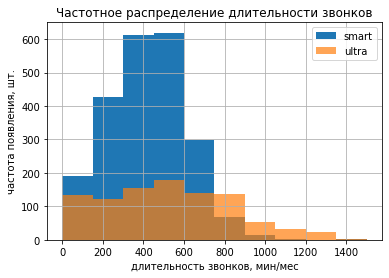

In [23]:
#сравним гистограммы для каждой услуги по каждому из тарифов, сначала для звонков
x = df_smart['calls_duration'].hist(bins=10, range=(0, 1500),label = 'smart')
y = df_ultra['calls_duration'].hist(bins=10, range=(0, 1500), label = 'ultra', alpha=0.7 )
plt.xlabel('длительность звонков, мин/мес')
plt.ylabel('частота появления, шт.')
plt.title("Частотное распределение длительности звонков")
x.legend()
y.legend()
plt.show()

Распределение близко к нормальному (разница между медианой и средней незначительна) Для абонентов ultra лимит звонков 3000 минут в месяц явно избыточен: большая часть укладывается в 1300 минут в месяц. А вот примерно трети абонентам smart приходится доплачивать за звонки, поскольку включенных 500 минут им не хватает. 

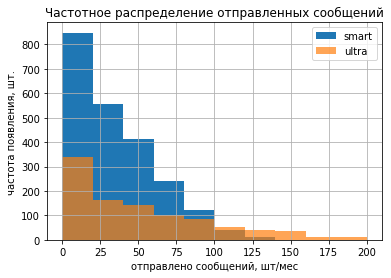

In [24]:
#теперь посмотрим данные по сообщениям
x = df_smart['messages'].hist(bins=10, range=(0, 200),label = 'smart')
y = df_ultra['messages'].hist(bins=10, range=(0, 200), label = 'ultra', alpha=0.7)
plt.xlabel('отправлено сообщений, шт/мес')
plt.ylabel('частота появления, шт.')
plt.title("Частотное распределение отправленных сообщений")
x.legend()
y.legend()
plt.show()

Датасеты скошены вправо, в т.ч. это видно, поскольку медиана меньше среднего. Для абонентов ultra лимит сообщений 1000 шт в месяц избыточен: большая часть отправляет не более 150-160 сообщений в месяц. А вот примерно трети абонентам smart приходится доплачивать за смс, поскольку включенных 50 сообщений им не хватает. 

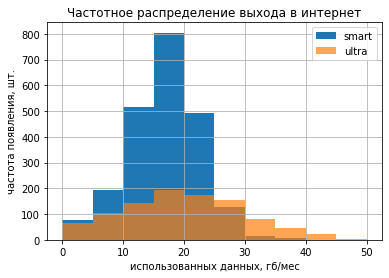

In [25]:
#изучим данные по интернет-трафику
x = df_smart['gb_used'].hist(bins=10, range=(0, 50),label = 'smart')
y = df_ultra['gb_used'].hist(bins=10, range=(0, 50), label = 'ultra', alpha=0.7)
plt.xlabel('использованных данных, гб/мес')
plt.ylabel('частота появления, шт.')
plt.title("Частотное распределение выхода в интернет")
x.legend()
y.legend()
plt.show()

Распределения данных в части использования интернета близко к нормальному для обоих тарифов.
При этом видно, что более половины абонентов с тарифом smart не укладываются в предоставляемый лимит 15 гб и вынуждены оплачивать дополнительный интернет сверх абонентской платы. Для абонентов ultra доля тех, кто превышает лимит 30 гб, гораздо меньше.

##  Проверка гипотез

Проверим гипотезу "Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются". Поскольку H₀ всегда формулируется так, чтобы использовать знак равенства, то это двусторонняя альтернативная гипотеза. **Нулевая гипотеза звучит так: "Средняя выручка пользователей тарифов «Ультра» и «Смарт» одинаковые"**. Для проверки проведем статистический тест на равенство среднего двух генеральных совокупностей по взятым из них выборкам.

In [26]:
df.pivot_table(index=['tariff'], values= ['total_income'], aggfunc= ['count','mean'])

,count,mean
,total_income,total_income
tariff,,
smart,2229,"1,290"
ultra,985,"2,070"


Мы видим, что наши выборки разного размера (985 абонентов с тарифом ultra vs 2229 абонентов с тарифом smart), а значит дисперсии одних и тех же показателей может сильно различаться. В связи с этим  при проведении статистического теста параметр equal_var нужно указать False, чтобы тест посчитал дисперсии выборок по отдельности.

In [27]:
ultra_income = df[df['tariff'] == "ultra"]['total_income']
smart_income = df[df['tariff'] == "smart"]['total_income']
alpha = .001
results = st.ttest_ind(ultra_income, smart_income, equal_var = False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 4.2606313931076085e-250
Отвергаем нулевую гипотезу


**По результатам проведения теста значение p-value стремится к нулю (10^-250). Таким образом, оснований отвергать гипотезу "Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются" нет**.

In [28]:
#сравним структуру выручки по каждому из тарифов сначала по средней величине
df.pivot_table(index=['tariff'], values= ['total_income', 'calls_income', 'messages_income', 'internet_income', 'tariff_income'], aggfunc= ['mean'])

mean                                                           
       calls_income internet_income messages_income tariff_income total_income
tariff                                                                        
smart           125             598              17           550        1,290
ultra             0             120               0          1950        2,070

Мы видим, что среднестатистический абонент с тарифом ultra приносит больше денег - в среднем 2070 руб. мес. при абонентской плате 1950 руб. В то время как абонент с тарифом smart приносит порядка 1290 руб. в мес. при абонентской плате 550 руб. Очевидно, что абоненты smart не укладываются в предоставляемы лимиты и тратятся на дополнительныу услуги: в основном на интернет, доп.расходы по нему даже превышают размер абонентской платы. Однако общая сумма их выручки все равно уступает абонентам ultra. Стоит отметить, что включенного интернета не хватает пользователям обоих тарифов.

In [29]:
#а теперь в абсолютных значениях 
df.pivot_table(index=['tariff'], values= ['total_income', 'calls_income', 'messages_income', 'internet_income', 'tariff_income'], aggfunc= ['sum'])

sum                                                           
       calls_income internet_income messages_income tariff_income total_income
tariff                                                                        
smart       278,217       1,332,400          38,784       1225950    2,875,351
ultra             0         118,350               0       1920750    2,039,100

Хотя абонентская плата ultra практически в 4 раза выше абнентской платы по тарифу smart, за счет оплаты дополнительных услуг абоненты smart в итоге принесли большую выручку. В итоге доля тарифов в общей выручке распределилась примерно в пропорции 60 (smart)/40 (ultra). Поэтому сделать однозначный вывод, какой тариф лучше, нельзя, т.к. с точки зрения выручки на абонента это однозначно тариф ultra, однако за счет большей базы абонентов smart и их покупками дополнительных услуг они в итоге приносят выручку больше, чем все абоненты ultra. Поддерживать и развивать нужно сбалансировано оба тарифа.

Теперь проверим еще одну гипотезу - "Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов". И вновь это альтернативная гипотеза в противовес нулевой, которая звучит так: **"Средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов"**.

In [30]:
display(df[df['city'] == "Москва"]['total_income'].count())
df[df['city'] != "Москва"]['total_income'].count()

611

2603

 Поскольку выборка по Москве значительно отличается от выборки по остальным городам (611 строк vs 2603 строк по остальным городам), в параметрах теста укажем equal_var = False.

In [31]:
moscow_income = df[df['city'] == "Москва"]['total_income']
regions_income = df[df['city'] != "Москва"]['total_income']
alpha = .001
results = st.ttest_ind(moscow_income, regions_income, equal_var = False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5257376663729298
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value говорит о том, что вероятность получить такое или большее различие случайно свыше 50%, что значительно выше критического уровня значимости даже в 5%. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними выручками Москвы и остальными регионами. Таким образом, у нас есть **все основания отвергнуть нашу гипотезу "Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов"**.

## Общий вывод

 - для каждого абонента помесячно мы рассчитали количество сделанных звонков и израсходованных минут, отправленных сообщений, объем израсходованного интернет-трафика, а также помесячную выручку;
 - для каждого тарифа мы определили cколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям в месяц, сравнив поведение пользователей между собой;
 - на основании проведенного анализа мы узнали, что тариф ultra с точки зрения выручки на одного абонента более выгоден, чем тариф smart: 2070 руб./мес. vs 1290 руб./мес. Однако за счет большей базы абонентов smart и их покупок дополнительных услуг они в итоге приносят выручку больше, чем все абоненты ultra.  Поэтому сделать однозначный вывод, какой тариф лучше, нельзя. Поддерживать и развивать нужно сбалансировано оба тарифа;
 - мы проверили гипотезу "Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются" с помощью статистического теста по проверке равенства среднего двух генеральных совокупностей по взятым из них выборками и не нашли оснований ее отвергнуть;
 - что касается другой гипотезы "Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов", то результаты теста показали высокое значение p-value, что дает нам все основания ее отвергнуть.